<a href="https://colab.research.google.com/github/Hyper-Dormant/FastAI/blob/master/wasteclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [30]:
from google.colab import drive 
drive .mount('/content/gdrive',force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir=root_dir + 'Trash'


Mounted at /content/gdrive


In [0]:
path=Path(base_dir)

In [32]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Trash/glass'),
 PosixPath('/content/gdrive/My Drive/Trash/paper'),
 PosixPath('/content/gdrive/My Drive/Trash/plastic'),
 PosixPath('/content/gdrive/My Drive/Trash/metal'),
 PosixPath('/content/gdrive/My Drive/Trash/trash'),
 PosixPath('/content/gdrive/My Drive/Trash/cardboard')]

In [0]:
classes = ['cardboard','glass','metal','paper','plastic','trash']

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
np.random.seed(42)

data= ImageDataBunch.from_folder(path, train='.',valid_pct=0.2,
        ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [36]:
print(f"Classes are: {data.classes} ")
print(f"number of classes are: {data.c} ")

Classes are: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'] 
number of classes are: 6 


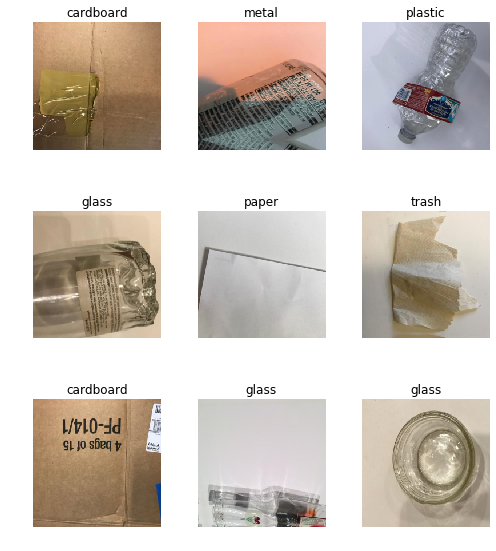

In [37]:
data.show_batch(rows=3,figsize=(7,8))

In [38]:
print(f"length of training set: {(len(data.train_ds))}")
print(f"length of validation set: {(len(data.valid_ds))}")

length of training set: 2022
length of validation set: 505


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [40]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.585079,0.689231,0.200000,00:35
1,1.004368,0.603005,0.182178,00:35
2,0.714545,0.452052,0.148515,00:35
3,0.535535,0.439738,0.154455,00:35


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


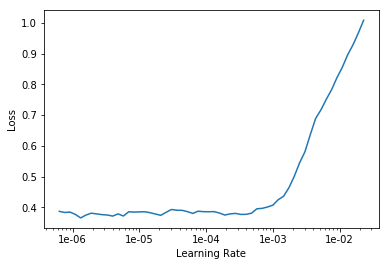

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(4,max_lr=slice(3e-05,5e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.373525,0.459694,0.142574,00:37
1,0.324567,0.462441,0.126733,00:37
2,0.232942,0.365558,0.102970,00:37
3,0.163161,0.360370,0.100990,00:37


In [0]:
learn.save('stage-2')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

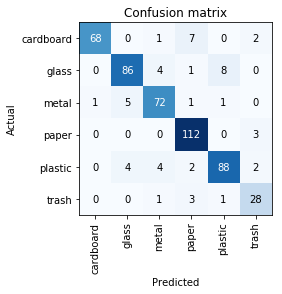

In [47]:
interp.plot_confusion_matrix()

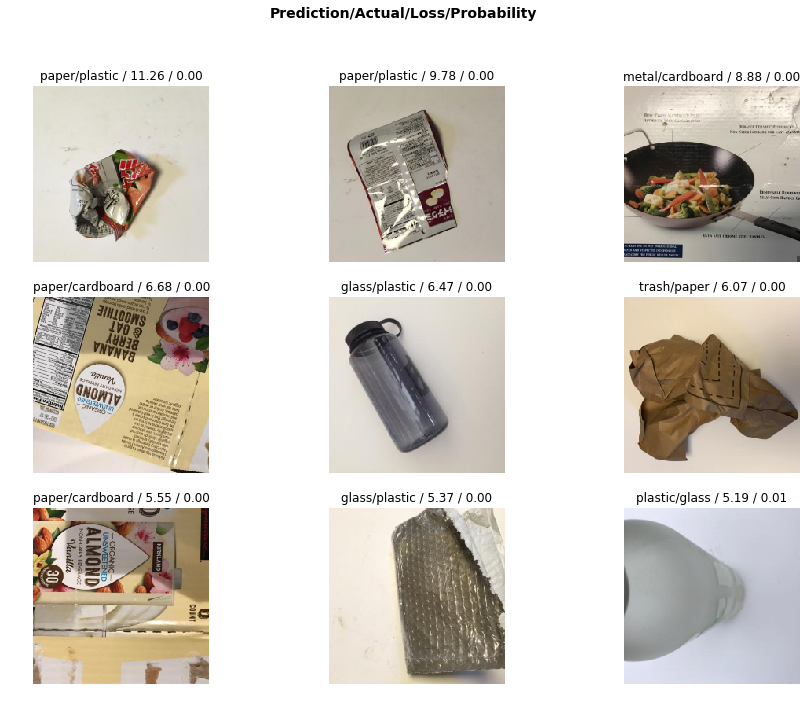

In [49]:
interp.plot_top_losses(9,figsize=(15,11))

In [50]:
interp.most_confused(min_val=3)

[('glass', 'plastic', 8),
 ('cardboard', 'paper', 7),
 ('metal', 'glass', 5),
 ('glass', 'metal', 4),
 ('plastic', 'glass', 4),
 ('plastic', 'metal', 4),
 ('paper', 'trash', 3),
 ('trash', 'paper', 3)]

In [51]:
learn.export()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/li